## Problem 2: Verification

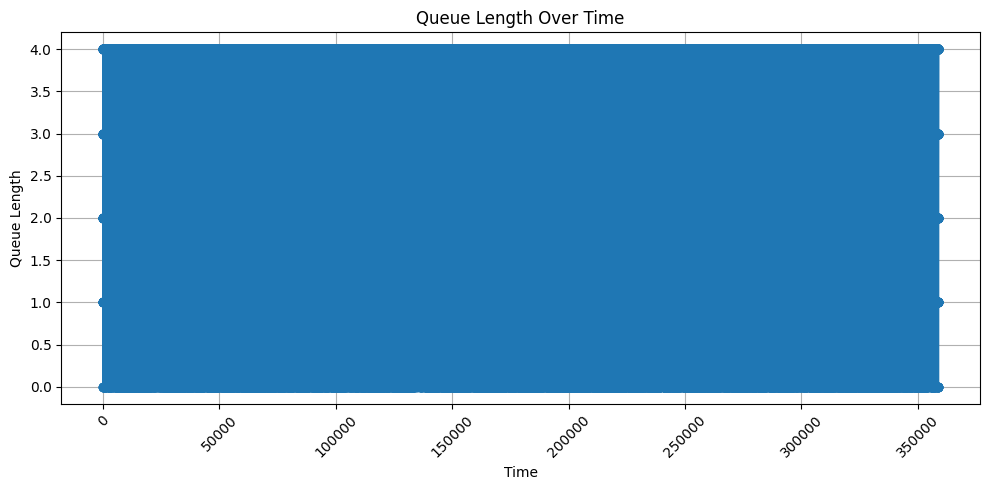

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

lambda_ = 1000 # customers per hour
mu = lambda_
mu_A = mu/3

M = 100000 # number of customers arrivals to simulate

# For A simulate M/M/2 queue with capacity 4
def simulate_A(M=M):
    """
    Event-driven simulation of M/M/2 queue with capacity 4
    """
    # Parameters
    num_customers = M
    arrival_rate = lambda_ / 3600  # customers per second
    service_rate = mu_A / 3600  # customers per second
    num_servers = 2
    queue_capacity = 4

    event_queue = {}
    ARR_EVENT = "arrival"
    DEP_EVENT = "departure"

    # Plan arrival of first customer
    event_queue[np.random.exponential(1 / arrival_rate)] = ARR_EVENT
    
    queue_length = 0
    arrived_customers = 0 # Tracked to stop the simulation
    passed_events = {}
    queue_length_history = {}
    
    
    while arrived_customers < num_customers:
        # Get the next event
        event_time = min(event_queue.keys())
        event_type = event_queue.pop(event_time)
        passed_events[event_time] = event_type
        
    
        if event_type == ARR_EVENT:
            arrived_customers += 1
            # Handle arrival
            if queue_length < queue_capacity:
                queue_length += 1
            if queue_length <= num_servers:
                # Schedule departure
                event_queue[event_time + np.random.exponential(1 / service_rate)] = DEP_EVENT
            
            # Schedule next arrival
            event_queue[event_time + np.random.exponential(1 / arrival_rate)] = ARR_EVENT
        
        elif event_type == DEP_EVENT:
            # Handle departure
            queue_length -= 1
            if queue_length >= num_servers:
                # Schedule next departure
                event_queue[event_time + np.random.exponential(1 / service_rate)] = DEP_EVENT
        
        queue_length_history[event_time] = queue_length
        
    return passed_events, queue_length_history 
         
    


import pandas as pd

passed_events, queue_length_history = simulate_A()
# Drop the first 100 events to avoid the initial transient state
#passed_events = {k: passed_events[k] for k in list(passed_events.keys())[100:]}
#queue_length_history = {k: queue_length_history[k] for k in list(queue_length_history.keys())[100:]}

queue_length_df = pd.DataFrame.from_dict(queue_length_history, orient='index', columns=['Queue Length'])
# Plot the queue length over time
plt.figure(figsize=(10, 5))
plt.plot(queue_length_df.index, queue_length_df['Queue Length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
import sympy
from IPython.display import display, Math


# Make weighted average of queue length from how long the queue was that length

# Calculate time differences between consecutive indices
time_differences = queue_length_df.index.to_series().shift(-1).diff().fillna(0)

queue_length_df["TimeSpent"] = time_differences

for i in range(5):
    display(
        Math(
            "\\hat{{P}}_{"
            + str(i)
            + "}="
            + str(
                np.mean(
                    np.mean(queue_length_df["Queue Length"] == i)
                )
                #sum(queue_length_df[queue_length_df["Queue Length"] == i]["TimeSpent"])
                #/ sum(queue_length_df["TimeSpent"])
            )
        )
    )
    display(
        Math(
            "\\text{State } "
            + str(i)
            + " \\text{ is active with freq: } "
            + str(
                sum(queue_length_df[queue_length_df["Queue Length"] == i]["TimeSpent"])
                / sum(queue_length_df["TimeSpent"])
            )
        )
    )

queue_length_df

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,Queue Length,TimeSpent
0.809478,1,0.000000
5.490980,2,2.660397
8.151377,3,1.692939
9.844316,4,0.658753
10.503070,4,1.141700
...,...,...
358800.394975,3,3.612405
358804.007380,2,5.461106
358809.468485,3,0.548694
358810.017179,4,7.648989


In [8]:

# Make equations for A
# P0 = (1/4) P1
# P1 = P0 + (2/5) P2
# P2 = (3/4) P1 + 2/5 P3
# P3 = (3/5) P2 + (2/5) P4
# P4 = (3/5) P3 + (3/5) P4


# Define the variables
P0, P1, P2, P3, P4 = sympy.symbols('P_{0}[A] P_{1}[A] P_{2}[A] P_{3}[A] P_{4}[A]')
lambda_ = sympy.Symbol("\\lambda")

# Define the equations
eq1 = sympy.Eq(P0, (1/4) * P1)
eq2 = sympy.Eq(P1, P0 + (2/5) * P2)
eq3 = sympy.Eq(P2, (3/4) * P1 + (2/5) * P3)
eq4 = sympy.Eq(P3, (3/5) * P2 + (2/5) * P4)
eq5 = sympy.Eq(P4, (3/5) * P3 + (3/5) * P4)
eq_sum1 = sympy.Eq(1, P0+P1+P2+P3+P4)

# Solve the equations
solution = sympy.solve([eq1, eq2, eq3, eq4, eq5, eq_sum1], (P0, P1, P2, P3, P4))
print(solution)

# Pretty print the solution as fractions
solution_fractions = {k: sympy.nsimplify(v) for k, v in solution.items()}

# Display solutions as LaTeX formatted output

for k, v in solution_fractions.items():
    display(Math(f"{sympy.latex(k)} = {sympy.latex(v)} = {v.evalf()}"))



{P_{0}[A]: 0.0246153846153846, P_{1}[A]: 0.0984615384615385, P_{2}[A]: 0.184615384615385, P_{3}[A]: 0.276923076923077, P_{4}[A]: 0.415384615384615}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
rate_0 = 1 
rate_1 = 4/3
rate_2 = 5/3
rate_3 = 5/3
rate_4 = 5/3

q_0 = (1/rate_0) * solution_fractions[P0] 
q_1 = (1/rate_1) * solution_fractions[P1]
q_2 = (1/rate_2) * solution_fractions[P2]
q_3 = (1/rate_3) * solution_fractions[P3]
q_4 = (1/rate_4) * solution_fractions[P4]

sum_q = q_0 + q_1 + q_2 + q_3 + q_4

# Show as pretty fractions q_i / sum_q
for i, q in enumerate([q_0, q_1, q_2, q_3, q_4]):
    display(Math(f"\\frac{{q_{i}}}{{\\sum q}} = \\frac{{{sympy.latex(q)}}}{{{sympy.latex(sum_q)}}} = {q/sum_q}"))
    display(Math(f"\\frac{{q_{i}}}{{\\sum q}} = \\frac{{{sympy.latex(q)}}}{{{sympy.latex(sum_q)}}} = {sympy.nsimplify(q/sum_q)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
q_0 * M, 

2461.53846153846